## GENDER  INEQUALITY IN ADULT INCOME

For several years, people in USA have complained that there is a gender based income inequality. In this project we are using available data to investigate such inequality, see if there are some trends that can explain where it originates from or at least why it's still preponderant.  We used these five available factors:
* Workclass
* Education
* Marital status
* Occupation
* Work hours per week

to investigate the relationship between gender and income.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In our dataset 66.8% of people were men while women were about 33.2%. This dataset fails to acknowledge that there might be people who are gender neutral or identify otherwise but we will go with it anyway.

In [5]:
df.groupby(by='gender').size().transform(lambda x: x/sum(x))

gender
Female    0.331518
Male      0.668482
dtype: float64

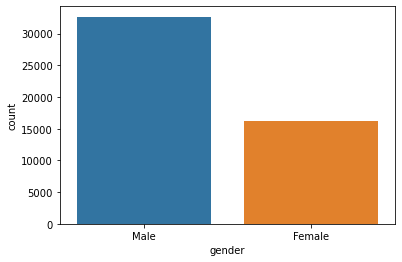

In [6]:
sns.countplot(data=df, x='gender',order=df['gender'].value_counts().index)

In [7]:
df.groupby(by='gender')['income'].value_counts(normalize=True)

gender  income
Female  <=50K     0.890749
        >50K      0.109251
Male    <=50K     0.696233
        >50K      0.303767
Name: income, dtype: float64

If we cut to the chase, we see that women who have income of less than or equal to 50K USD account for about 89% of all women while women who have income of more than 50K USD account for only 11%. On the other hand a whooping 30.4% of men in the workforce have an income of more than 50K USD (we will refer to this as high income), an actual income disparity, but why?

In [8]:
def count_plot(x_val, col='gender'):
    fig = plt.figure(figsize=(14,8))

    ax_1 = fig.add_subplot(211)
    sns.countplot(x=x_val,hue=col ,palette='tab10',order=df[x_val].value_counts(normalize=True).index,data=df,ax=ax_1)
    plt.xticks(rotation=45)

    fig.tight_layout(pad=2.0)

    ax_2 = fig.add_subplot(212)
    sns.countplot(x=x_val,hue='income',palette='tab10',order=df[x_val].value_counts(normalize=True).index,data=df,ax=ax_2)
    plt.xticks(rotation=45);

In [9]:
def pct_plots(x_val, col='gender'):
    
    fig = plt.figure(figsize=(10,7))
    
    ax_1 = fig.add_subplot(211)
    occupation_counts = (df.groupby([col])[x_val]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(x_val))
    p = sns.barplot(x=x_val, y="percentage", hue=col, data=occupation_counts, ax=ax_1)
    _ = plt.setp(p.get_xticklabels(), rotation=45)
    
    fig.tight_layout(pad=2.0)
        
    ax_2 = fig.add_subplot(212)
    col_counts = (df.groupby(['income'])[x_val]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(x_val))
    p = sns.barplot(x=x_val, y="percentage", hue='income', data=col_counts, ax=ax_2)
    _ = plt.setp(p.get_xticklabels(), rotation=45)

#### 1. Workclass

If we take a look at the workforce, we see that the vast majority of male and female work in the private sector, which was expected. We can say that working in private sector or government, or being self-employed, etc is not explicitly a great contributor to income inequality since both gender are relatively equally distributed in different workclass. Implicitly though, since there is twice as many male than female in the workforce listed above, that alone will propagate income inequality since there are more women who are unemployed than men. This factor will be present but hidden in every analysis. Also the share of men who are self-employed is way larger than that of women while almost half of people who are self-employed earn a higher income.

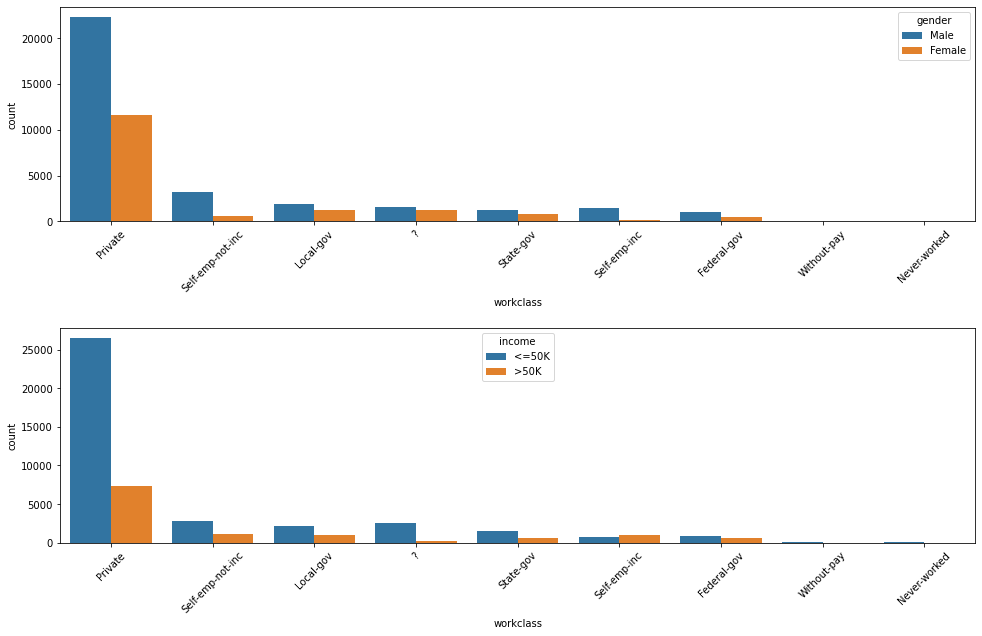

In [10]:
count_plot('workclass', col='gender')

If you look at the raw number as shown above, as expected the private sector contains the largest share of people with large income, and male are twice as many in the private sector than women share exacerbate the income inequality.

#### 2. Education

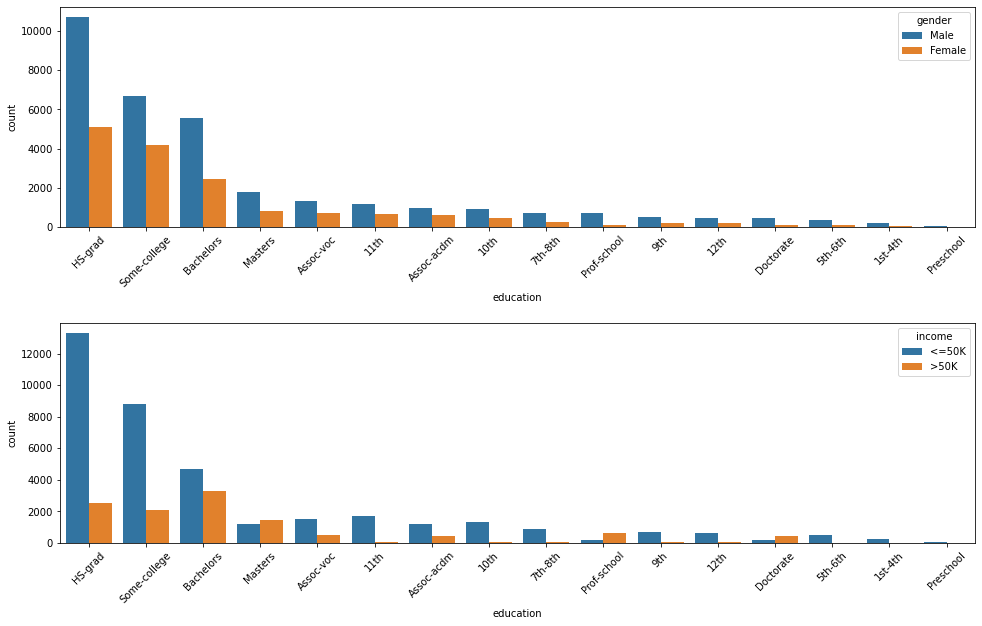

In [11]:
count_plot('education', col='gender')

It is expected that people generally people with a higher education earn more income than those with lower education. The first figure shows that there are more men than women in every level of education (which is not representative of the population). The only levels of education where more people earn income than those who don't are `masters`, `prof-school` and `Doctorate` and again there are more men than women in those categories.

#### 3. Marital Status

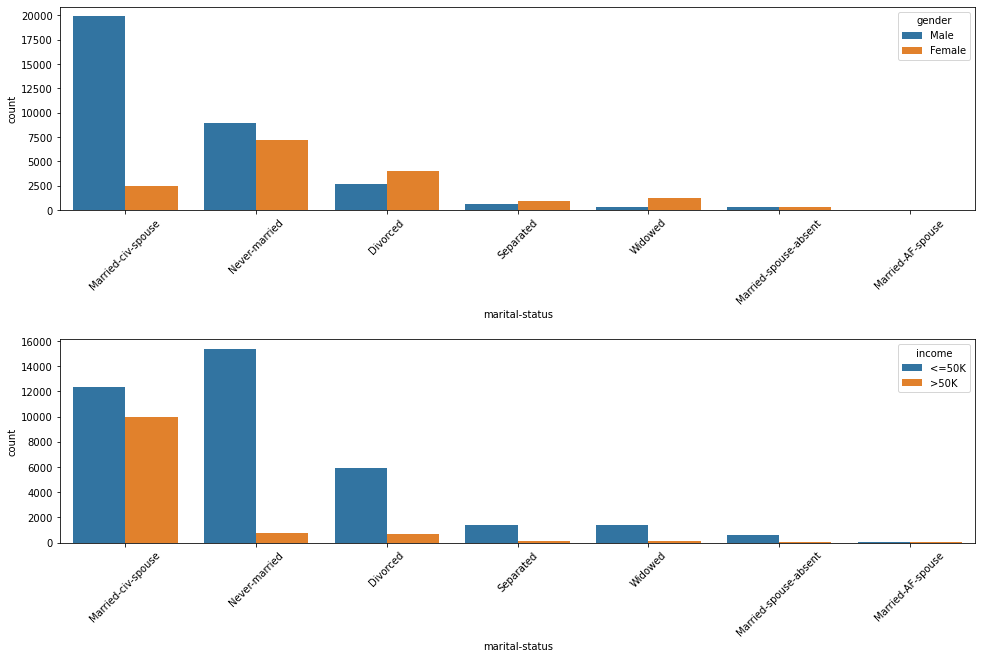

In [12]:
#pct_plots('marital-status', col='gender')
count_plot('marital-status', col='gender')

In this dataset, there are 8 times more men who are civilly married than women! this would seem to show some bias in the sampling (unless more gay married men were sampled which would still be a problem!) but looking closely you might see that many men are married to women who are unemployed. The data seem to show that  married people are stable tend to earn higher income than those who are not, marriage everyone! Even if there was a sampling problem, the data still capture what the real world shows, which is, there are more single women than single men, divorced women than divorced men and wodowed women than widowed men, and this would explain why men have a higher chance to earn higher income than women.

#### 4. Occupation

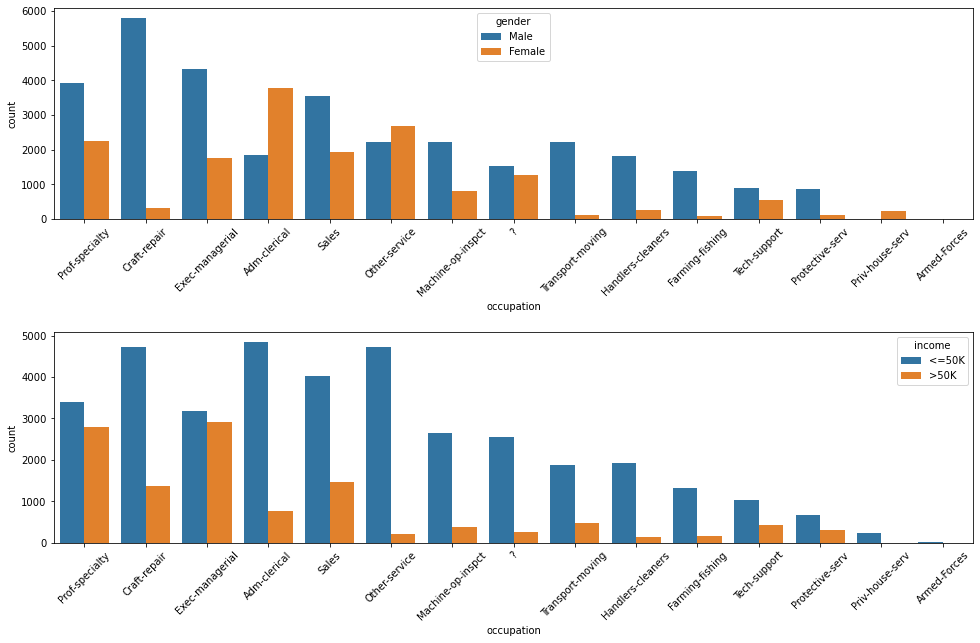

In [13]:
#pct_plots('occupation', col='gender')
count_plot('occupation', col='gender')

This category, perhaps explains better than others why men earn higher income than women on average! the `prof-speciality` and `Exec-managerial` categories which contains the largest share of  people with higher income are overwhelmingly occupied by men. To add insult to the injury, the occupations that are overwhelmingly female (`Adm-clerical` and `other services`) represent people with the largest share of lower income!

#### 5. Work Hours per Week

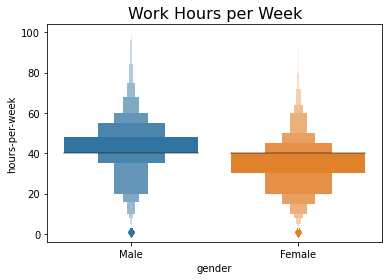

In [14]:
sns.boxenplot(x='gender',y='hours-per-week',data=df)
plt.title("Work Hours per Week",fontsize=16);

In [15]:
df.groupby(by='gender')['hours-per-week'].mean()

gender
Female    36.400692
Male      42.416845
Name: hours-per-week, dtype: float64

On average, men worked 6 more hours per week than women which might be explained by the types of jobs they hold as discussed above and because they receive better opportunities, they unfairly receive more income.

### CONCLUSION

* There are less women in the workplace than men while women are the majority in the population
* Men and women represent almost the same share of workclass, except that way more men are self-employed than women and self-employed people generate more higher income.
* Way More men than women have a master's degree or a doctorate degree, which present larger shares of people with higher income.
* The percentage of women who collectively are widowed, separated, or divorced is higher than that of men. Unmarried people represented a higher share of people with a lower income.
* Way more men worked in occupations that generate the highest income than women. Way more women worked in occupations that generate the lowest income than men.
* Men worked 6 more hours per week on average than women.